In [1]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt

In [2]:
email = pd.read_csv('emails.csv')

In [3]:
email

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
email.describe

<bound method NDFrame.describe of                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]>

In [5]:
email.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Visualize the data

In [7]:
spam0 = email[email['spam']== 0]

In [8]:
spam1 = email[email['spam']== 1]

In [9]:
spam0

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [10]:
spam1

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [11]:
print('spam1 Pecentage =',(len(spam1) / len(email))*100,'%')

spam1 Pecentage = 23.88268156424581 %


In [12]:
print('spam0 Pecentage =',(len(spam0) / len(email))*100,'%')

spam0 Pecentage = 76.11731843575419 %


<AxesSubplot:xlabel='spam', ylabel='count'>

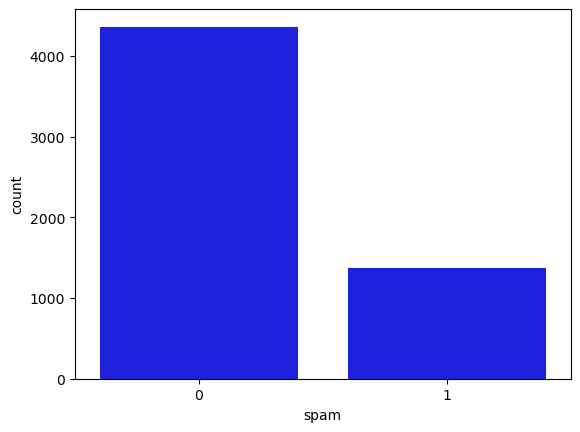

In [13]:
sns.countplot(x = email['spam'],label = 'spam vs spam0',color ='blue' )

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer= CountVectorizer()
spam1spam0_CountVectorizer=Vectorizer.fit_transform(email['text'])

In [15]:
print(Vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [16]:
label = email['spam']
x = spam1spam0_CountVectorizer
y =  label

In [17]:
x.shape

(5728, 37303)

In [18]:
y.shape

(5728,)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [21]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

# Evaluating The Model

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
y_predict_train = NB_classifier.predict(x_train)
y_predict_train

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [24]:
cm = confusion_matrix(y_train,y_predict_train)

<AxesSubplot:>

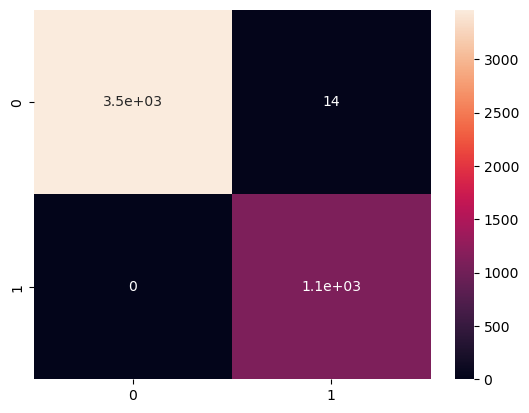

In [25]:
sns.heatmap(cm,annot=True)

In [26]:
y_predict_test = NB_classifier.predict(x_test)
y_predict_test

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [27]:
cm = confusion_matrix(y_test,y_predict_test)

In [28]:
cm

array([[872,  10],
       [  2, 262]], dtype=int64)

<AxesSubplot:>

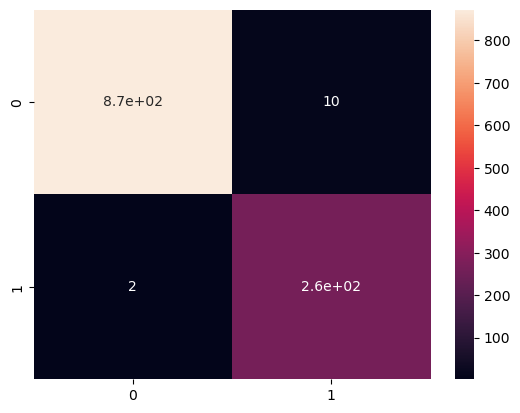

In [29]:
sns.heatmap(cm, annot = True)

In [30]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       882
           1       0.96      0.99      0.98       264

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

